In [1]:
using ApproxFun, SingularIntegralEquations, Plots,Interact,Reactive; gadfly();

    writemime(Base.IO, Base.Multimedia.MIME, Reactive.Signal) at /Users/Mikael/.julia/v0.4/Interact/src/IJulia/setup.jl:99
is ambiguous with: 
    writemime(Base.IO, Base.Multimedia.MIME{:text/plain}, Any) at replutil.jl:4.
To fix, define 
    writemime(Base.IO, Base.Multimedia.MIME{:text/plain}, Reactive.Signal)
before the new definition.


# Benjamin-Ono equation with periodic boundary conditions $$u_t+uu_x+H\{u_{xx}\}=0$$

[Plots.jl] Initializing backend: gadfly


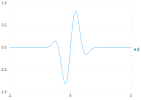

In [2]:
a,b = -5,5
u0,t=Fun(x->sinpi(x)*exp(-x^2),Laurent(PeriodicInterval(a,b))),0.0
sp=space(u0);D=Derivative(sp);H=Hilbert(sp)
L = -H*D^2
N(u,t) = -u*u'
x=Signal(u0);map(y->plot(real(y);xlims=(a,b),ylims=(-1.,1.)).o,x)

In [3]:
u0,t=ETDRK4(L,N,u0,t,0.01,200,x,1e-8);

# Here is a 1-periodic wave solution

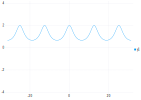

In [4]:
a,b = -10π,10π
u0,t=Fun(x->1/(1-0.5cos(x/2)),Laurent(PeriodicInterval(a,b))),0.0
sp=space(u0);D=Derivative(sp);H=Hilbert(sp)
L = -H*D^2
N(u,t) = -u*u'
x=Signal(u0);map(y->plot(real(y);xlims=(a,b),ylims=(-4.,4.)).o,x)

In [5]:
u0,t=ETDRK4(L,N,u0,t,0.01,200,x,1e-8); # It moves very slowly to the right.

(Fun(Complex{Float64}[1.1547+8.86809e-18im,-6.98615e-18+1.20612e-17im,-3.6917e-18-1.20045e-17im,1.782e-17+2.89833e-18im,5.03767e-18+3.23001e-18im,-2.31054e-17-5.84352e-18im,-2.05104e-17+7.94424e-18im,3.09237e-17+8.9312e-17im,3.96379e-17-8.78296e-17im,0.22622+0.210051im  …  -2.52576e-19-5.06234e-20im,-3.42469e-19-4.97632e-21im,-3.59429e-20-5.37866e-19im,-1.29209e-20+4.92108e-19im,1.46593e-18-4.0761e-19im,1.56432e-18+3.92421e-19im,1.35173e-18+9.7631e-19im,1.01584e-18-8.51967e-19im,1.11325e-8-8.34946e-10im,1.11325e-8+8.34946e-10im],Laurent(【-31.41592653589793,31.41592653589793❫)),2.0000000000000013)